In [2]:
import keras
keras.__version__

'2.8.0'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
new_base_dir = '/content/drive/MyDrive/Colab Notebooks/datasets/bbc'

# preparing the training data

In [5]:
import os
from gensim.parsing.preprocessing import remove_stopwords
from string import digits
import string


remove_digits = str.maketrans('', '', digits)

train_dir = os.path.join(new_base_dir, 'train')

train_labels = []
train_data = []

for label_type in ['business', 'entertainment','politics', 'sport', 'tech']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':       
            f = open(os.path.join(dir_name, fname),encoding='latin1')     
            a = remove_stopwords(f.read()) 
            a = a.translate(remove_digits) 
            a = a.translate(str.maketrans('', '', string.punctuation))
            train_data.append(a)
            f.close()
            if label_type == 'business':
                train_labels.append(0)
            elif label_type == 'entertainment':
                train_labels.append(1)
            elif label_type == 'politics':
                train_labels.append(2)
            elif label_type == 'sport':
                train_labels.append(3)    
            else:
                train_labels.append(4)

In [6]:
len(train_data)

1725

In [7]:
len(train_labels)

1725

In [8]:
print(train_labels[409])
print(train_labels[410])
print(train_labels[696])
print(train_labels[1013])
print(train_labels[1424])
print(train_labels[0])



0
1
2
3
4
0


In [9]:
print(train_data[0])

UK economy facing major risks The UK manufacturing sector continue face serious challenges years British Chamber Commerce BCC said The groups quarterly survey companies exports picked months  best levels years The rise came despite exchange rates cited major concern However BCC UK economy faced major risks warned growth set slow It recently forecast economic growth slow   little    Manufacturers domestic sales growth fell slightly quarter survey  firms found Employment manufacturing fell job expectations lowest level year Despite positive news export sector worrying signs manufacturing BCC said These results reinforce concern sectors persistent inability sustain recovery The outlook service sector uncertain despite increase exports orders quarter BCC noted The BCC confidence increased quarter manufacturing service sectors overall failed reach levels start  The reduced threat rate increases contributed improved confidence said The Bank England raised rates times November  August year Bu

In [10]:
type(train_data)

list

# tokenization of training data

In [11]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100  # We will cut reviews after 100 words
training_samples = 1380  # We will be training on 1380 samples
validation_samples = 345  # We will be validating on 345 samples
max_words = 10000  # We will only consider the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_data)
sequences = tokenizer.texts_to_sequences(train_data)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 28180 unique tokens.


In [12]:
data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(train_labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (1725, 100)
Shape of label tensor: (1725,)


In [13]:
data[0]

array([ 634, 2709, 1909, 1353, 5728,    2,  918,  581, 6760,  961, 2916,
       4974, 6761, 4671,  938,    1, 2106,   93,  634, 4672,  156,  305,
        999, 1327,  354, 5728, 3385,    1, 5728,  860,  755,  354, 1353,
         93, 2916, 1059,  439,  982,  763,  121,    1, 1910,  704,  320,
       1707, 5320, 1480,  860,    2,    1,  119,   38,  873,  378,  188,
        392,  962,   10,    8,  378, 1014,  385, 1574, 1909, 1246,  365,
        860, 2107, 1205,    1,  568,  325, 3656, 7405,  305, 2917,  704,
        453,  764,  523,  282, 5728,  115,  165,  248, 2530,    2,  724,
        365,  211,   40, 3844,   69, 1171,  336,  999,  173, 7406, 2213,
       1708], dtype=int32)

In [14]:
word_index

{'the': 1,
 'said': 2,
 'i': 3,
 'mr': 4,
 'it': 5,
 'new': 6,
 'people': 7,
 'but': 8,
 'us': 9,
 'year': 10,
 'he': 11,
 'years': 12,
 'a': 13,
 'in': 14,
 'time': 15,
 'we': 16,
 'government': 17,
 'world': 18,
 'm': 19,
 'told': 20,
 'its': 21,
 'best': 22,
 'uk': 23,
 'game': 24,
 'music': 25,
 'like': 26,
 'bbc': 27,
 'added': 28,
 'number': 29,
 'way': 30,
 'this': 31,
 'says': 32,
 'market': 33,
 'good': 34,
 'games': 35,
 'home': 36,
 'and': 37,
 'england': 38,
 'bn': 39,
 'set': 40,
 'company': 41,
 'there': 42,
 'think': 43,
 'going': 44,
 'work': 45,
 'film': 46,
 'â£m': 47,
 'use': 48,
 'firm': 49,
 'million': 50,
 'they': 51,
 'want': 52,
 'week': 53,
 'win': 54,
 'that': 55,
 'players': 56,
 'public': 57,
 'labour': 58,
 'sales': 59,
 'won': 60,
 'play': 61,
 'european': 62,
 'news': 63,
 'minister': 64,
 'however': 65,
 'technology': 66,
 'blair': 67,
 'expected': 68,
 'months': 69,
 'second': 70,
 'group': 71,
 'end': 72,
 'if': 73,
 'election': 74,
 'british': 75,
 'g

# Split the data into a training set and a validation set

In [15]:
# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where sample are ordered (all negative first, then all positive).
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

In [16]:
#get spread of classes in train
unique, count = np.unique(y_train, return_counts=True)
print(unique)
print(count)

[0 1 2 3 4]
[324 236 260 324 236]


# Creating simple model without pretrain

In [17]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, 64, input_length=maxlen))
model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           640000    
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 32)                204832    
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 5)                 85        
                                                                 
Total params: 845,445
Trainable params: 845,445
Non-trainable params: 0
_________________________________________________________________


In [18]:
print(x_train.shape, x_val.shape)
print(y_train.shape, y_val.shape)

(1380, 100) (345, 100)
(1380,) (345,)


# fit data in model and check validation accuracy

In [19]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Epoch 1/10
44/44 [==============================] - 4s 9ms/step - loss: 1.5512 - acc: 0.3232 - val_loss: 1.3848 - val_acc: 0.5072
Epoch 2/10
44/44 [==============================] - 0s 4ms/step - loss: 1.0178 - acc: 0.7449 - val_loss: 0.8579 - val_acc: 0.7507
Epoch 3/10
44/44 [==============================] - 0s 5ms/step - loss: 0.2648 - acc: 0.9942 - val_loss: 0.3806 - val_acc: 0.8957
Epoch 4/10
44/44 [==============================] - 0s 4ms/step - loss: 0.0205 - acc: 1.0000 - val_loss: 0.2445 - val_acc: 0.9217
Epoch 5/10
44/44 [==============================] - 0s 4ms/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.2095 - val_acc: 0.9246
Epoch 6/10
44/44 [==============================] - 0s 4ms/step - loss: 1.4366e-04 - acc: 1.0000 - val_loss: 0.1925 - val_acc: 0.9304
Epoch 7/10
44/44 [==============================] - 0s 4ms/step - loss: 1.2683e-05 - acc: 1.0000 - val_loss: 0.1956 - val_acc: 0.9275
Epoch 8/10
44/44 [==============================] - 0s 4ms/step - loss: 1.5561e-06

# plotting training and validation accuracy

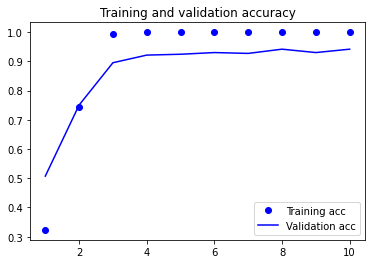

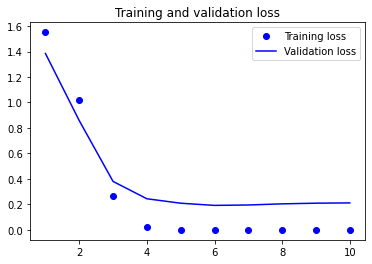

In [20]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Preparing Test Data

In [21]:
test_dir = os.path.join(new_base_dir, 'test')

test_labels = []
test_data = []

for label_type in ['business', 'entertainment','politics', 'sport', 'tech']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':       
            f = open(os.path.join(dir_name, fname))        
            a = remove_stopwords(f.read()) # removing stopwords
            a = a.translate(remove_digits) # removing digits
            a = a.translate(str.maketrans('', '', string.punctuation)) # removing punctuation  
            test_data.append(a)
            f.close()
            if label_type == 'business':
                test_labels.append(0)
            elif label_type == 'entertainment':
                test_labels.append(1)
            elif label_type == 'politics':
                test_labels.append(2)
            elif label_type == 'sport':
                test_labels.append(3)    
            else:
                test_labels.append(4)

sequences = tokenizer.texts_to_sequences(test_data)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(test_labels)

In [22]:
print(len(x_test))
print(len(y_test))

500
500


# evaluating model on test data

In [23]:
model.evaluate(x_test, y_test)

16/16 [==============================] - 0s 2ms/step - loss: 0.1582 - acc: 0.9500


[0.1582261025905609, 0.949999988079071]

# Test Accuracy = 92%

# Using pretrained Glove Model

In [24]:
glove_dir = '/content/drive/MyDrive/Colab Notebooks/glove.6B'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [25]:
len(word_index)

28180

In [26]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

In [27]:
embedding_matrix[2000]

array([ 0.39243001, -0.021736  , -0.086949  ,  0.18288   , -0.10802   ,
       -0.32512   , -0.33881   ,  0.28652999,  0.11288   , -0.20399   ,
        0.25962999,  0.8003    ,  0.072678  ,  0.61192   ,  0.01557   ,
       -0.74147999, -0.074433  ,  0.25951001,  0.43291   ,  0.19305   ,
       -0.75418001,  0.11783   , -0.23720001,  0.99037999, -0.36273   ,
       -0.64504999, -0.56847   , -0.62812001, -0.50446999, -0.38536   ,
        0.84289998,  0.18189   , -0.45210001, -0.38490999, -0.36796001,
        0.42899999,  0.24612001,  0.11744   , -0.46342999, -0.38428   ,
        0.22799   ,  0.069995  , -0.11054   ,  0.40669999, -0.19937   ,
       -0.47464001, -0.37696001, -0.66829997,  0.032884  , -0.59792   ,
       -0.14269   ,  0.15245   ,  0.26383001,  0.7069    ,  0.093431  ,
       -0.60867   ,  0.19171999, -1.26300001,  2.11129999,  0.55993003,
        0.30873001, -0.39096001, -0.058056  , -0.39776   ,  0.66377002,
       -0.27748999,  0.21975   ,  0.39133999,  1.18009996, -0.96

In [28]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

glove_model = Sequential()
glove_model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
glove_model.add(Flatten())
glove_model.add(Dense(32, activation='relu'))
glove_model.add(Dense(16, activation='relu'))
glove_model.add(Dense(5, activation='softmax'))
glove_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_1 (Flatten)         (None, 10000)             0         
                                                                 
 dense_3 (Dense)             (None, 32)                320032    
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 5)                 85        
                                                                 
Total params: 1,320,645
Trainable params: 1,320,645
Non-trainable params: 0
_________________________________________________________________


In [29]:
glove_model.layers[0].set_weights([embedding_matrix])
glove_model.layers[0].trainable = False

In [30]:
print(x_train.shape, x_val.shape)
print(y_train.shape, y_val.shape)

(1380, 100) (345, 100)
(1380,) (345,)


In [31]:
glove_model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = glove_model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
glove_model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
44/44 [==============================] - 1s 7ms/step - loss: 0.8165 - accuracy: 0.7007 - val_loss: 0.3046 - val_accuracy: 0.8899
Epoch 2/10
44/44 [==============================] - 0s 3ms/step - loss: 0.0987 - accuracy: 0.9717 - val_loss: 0.2653 - val_accuracy: 0.9014
Epoch 3/10
44/44 [==============================] - 0s 4ms/step - loss: 0.0201 - accuracy: 0.9978 - val_loss: 0.2416 - val_accuracy: 0.9072
Epoch 4/10
44/44 [==============================] - 0s 4ms/step - loss: 0.0081 - accuracy: 0.9986 - val_loss: 0.2937 - val_accuracy: 0.9043
Epoch 5/10
44/44 [==============================] - 0s 3ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.2516 - val_accuracy: 0.9072
Epoch 6/10
44/44 [==============================] - 0s 4ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.2456 - val_accuracy: 0.9072
Epoch 7/10
44/44 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.2439 - val_accuracy: 0.9130
Epoch 8/10
44/44 [==

In [32]:
glove_model.evaluate(x_test, y_test)

16/16 [==============================] - 0s 2ms/step - loss: 0.1878 - accuracy: 0.9440


[0.18780013918876648, 0.9440000057220459]

# After Using Glove Pretrained Model, Test Accuracy = 93.20%

# Classification using FastText vectorizer

In [33]:
import keras
from keras import optimizers
from keras import backend as K
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D 
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping

from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer 
import os, re, csv, math, codecs

In [34]:

#load embeddings
print('loading word embeddings...')
embeddings_index = {}
f = codecs.open('/content/drive/MyDrive/Colab Notebooks/wiki.simple.vec', encoding='utf-8')
for line in tqdm(f):
    values = line.rstrip().rsplit(' ')
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('found %s word vectors' % len(embeddings_index))



#embedding matrix
MAX_NB_WORDS = 10000
embed_dim = 300

print('preparing embedding matrix...')
words_not_found = []
nb_words = min(MAX_NB_WORDS, len(word_index))
embedding_matrix = np.zeros((nb_words, embed_dim))
for word, i in word_index.items():
    if i >= nb_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if (embedding_vector is not None) and len(embedding_vector) > 0:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
    else:
        words_not_found.append(word)
print('number of null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))


loading word embeddings...


111052it [00:10, 10288.38it/s]


found 111052 word vectors
preparing embedding matrix...
number of null word embeddings: 813


In [35]:
fast_model = Sequential()
fast_model.add(Embedding(nb_words, embed_dim,
          weights=[embedding_matrix], input_length=maxlen, trainable=False))
fast_model.add(Flatten())

fast_model.add(Dense(16, activation='relu'))
fast_model.add(Dense(32, activation='relu'))
fast_model.add(Dense(5, activation='softmax'))
fast_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 300)          3000000   
                                                                 
 flatten_2 (Flatten)         (None, 30000)             0         
                                                                 
 dense_6 (Dense)             (None, 16)                480016    
                                                                 
 dense_7 (Dense)             (None, 32)                544       
                                                                 
 dense_8 (Dense)             (None, 5)                 165       
                                                                 
Total params: 3,480,725
Trainable params: 480,725
Non-trainable params: 3,000,000
_________________________________________________________________


In [36]:
fast_model.layers[0].set_weights([embedding_matrix])
fast_model.layers[0].trainable = False
fast_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [63]:
train_data = np.array(train_data)
train_labels = np.array(train_labels)
test_data = np.array(test_data)
test_labels = np.array(test_labels)


In [68]:
# print(train_data.shape(), train_labels.shape())
# print(test_data.shape(), test_labels.shape())
type(x_train)
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(1380, 100)
(1380,)
(345, 100)
(345,)


In [77]:
import tensorflow as tf


tf.config.run_functions_eagerly(True)

fast_model.fit(x_train, y_train,
                    validation_data=(x_val, y_val),
                    epochs=6,
                    batch_size=32
                    )

Epoch 1/6
44/44 [==============================] - 41s 942ms/step - loss: 0.1073 - accuracy: 0.9623 - val_loss: 2.5330 - val_accuracy: 0.2087
Epoch 2/6
44/44 [==============================] - 1s 31ms/step - loss: 0.1085 - accuracy: 0.9587 - val_loss: 2.9563 - val_accuracy: 0.2000
Epoch 3/6
44/44 [==============================] - 1s 31ms/step - loss: 0.1198 - accuracy: 0.9616 - val_loss: 2.5889 - val_accuracy: 0.2551
Epoch 4/6
44/44 [==============================] - 2s 52ms/step - loss: 0.0966 - accuracy: 0.9659 - val_loss: 2.7928 - val_accuracy: 0.2928
Epoch 5/6
44/44 [==============================] - 1s 29ms/step - loss: 0.0918 - accuracy: 0.9645 - val_loss: 2.6755 - val_accuracy: 0.2174
Epoch 6/6
44/44 [==============================] - 2s 37ms/step - loss: 0.0906 - accuracy: 0.9616 - val_loss: 2.5609 - val_accuracy: 0.2493


In [84]:
x_test.shape

(500, 100)

In [87]:
x_test1 = x_test[:345, :]

In [88]:
x_test.shape

(345, 100)

In [89]:
y_test.shape

(345,)

In [90]:

fast_model.evaluate(x_test1, y_test)

11/11 [==============================] - 0s 11ms/step - loss: 2.7816 - accuracy: 0.1768


[2.781627655029297, 0.1768115907907486]

# Classification using word2vec vectorizer

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import warnings


data_tuples = list(zip(train_data,train_labels))
df = pd.DataFrame(data_tuples, columns=['News','Label'])

vec_model = Word2Vec(df, min_count=1)
w2v = dict(zip(vec_model.wv.index2word, vec_model.wv.syn0))

class Vectorizer(object):
    
    def __init__(self, vec):
        self.vec = vec
        self.dim = len(vec.values())

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([np.mean([self.vec[w] for w in words if w in self.vec] or [np.zeros(self.dim)], axis=0) for words in X])

class Classifier(object):
    
    def __init__(self, model, param):
        self.model = model
        self.param = param
        self.gs = GridSearchCV(self.model, self.param, cv=5, error_score=0, refit=True)        

    def fit(self, X, y):        
        return self.gs.fit(X, y)

    def predict(self, X):
        return self.gs.predict(X)

X_train, X_test, y_train, y_test = train_test_split(df['News'], df['Label'], test_size=0.2, shuffle=True)
clf = Pipeline([('Word2Vec vectorizer', Vectorizer(w2v)), ('Classifier', model)])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).


44/44 [==============================] - 0s 4ms/step - loss: 2.1608 - acc: 0.2022


# Glove Model with LSTM 

In [122]:
from keras.layers import LSTM
glove_model = Sequential()
glove_model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
# glove_model.add(LSTM(16))
glove_model.add(LSTM(32))
glove_model.add(Dense(5, activation='softmax'))
glove_model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 100, 100)          1000000   
                                                                 
 lstm_14 (LSTM)              (None, 32)                17024     
                                                                 
 dense_17 (Dense)            (None, 5)                 165       
                                                                 
Total params: 1,017,189
Trainable params: 1,017,189
Non-trainable params: 0
_________________________________________________________________


In [114]:
embedding_matrix.shape

(10000, 300)

In [115]:
type(glove_model)

keras.engine.sequential.Sequential

In [123]:
# glove_model.layers[0].set_weights([embedding_matrix])
# glove_model.layers[0].trainable = False

glove_model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = glove_model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
glove_model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
44/44 [==============================] - 2s 36ms/step - loss: 1.6047 - accuracy: 0.2326 - val_loss: 1.5960 - val_accuracy: 0.2464
Epoch 2/10
44/44 [==============================] - 2s 39ms/step - loss: 1.5193 - accuracy: 0.3449 - val_loss: 1.6015 - val_accuracy: 0.2319
Epoch 3/10
44/44 [==============================] - 2s 39ms/step - loss: 1.1468 - accuracy: 0.6949 - val_loss: 1.7609 - val_accuracy: 0.2116
Epoch 4/10
44/44 [==============================] - 1s 31ms/step - loss: 0.6700 - accuracy: 0.8797 - val_loss: 2.0010 - val_accuracy: 0.2058
Epoch 5/10
44/44 [==============================] - 1s 32ms/step - loss: 0.3755 - accuracy: 0.9471 - val_loss: 2.1908 - val_accuracy: 0.2203
Epoch 6/10
44/44 [==============================] - 1s 31ms/step - loss: 0.2200 - accuracy: 0.9522 - val_loss: 2.4855 - val_accuracy: 0.2116
Epoch 7/10
44/44 [==============================] - 1s 30ms/step - loss: 0.1589 - accuracy: 0.9580 - val_loss: 2.6047 - val_accuracy: 0.1942
Epoch 8/10
44

In [124]:
glove_model.evaluate(x_test, y_test)

11/11 [==============================] - 0s 14ms/step - loss: 2.9976 - accuracy: 0.1884


[2.997629404067993, 0.18840579688549042]

# FastText Model with LSTM 

In [125]:
fast_model = Sequential()
fast_model.add(Embedding(nb_words, embed_dim,
          weights=[embedding_matrix], input_length=maxlen, trainable=False))
# fast_model.add(Flatten())
fast_model.add(LSTM(32))
fast_model.add(Dense(5, activation='softmax'))
fast_model.summary()


fast_model.layers[0].set_weights([embedding_matrix])
fast_model.layers[0].trainable = False
fast_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


train_data = np.array(train_data)
train_labels = np.array(train_labels)
test_data = np.array(test_data)
test_labels = np.array(test_labels)

import tensorflow as tf


tf.config.run_functions_eagerly(True)

fast_model.fit(x_train, y_train,
                    validation_data=(x_val, y_val),
                    epochs=6,
                    batch_size=32
                    )


fast_model.evaluate(x_test, y_test)


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, 100, 300)          3000000   
                                                                 
 lstm_15 (LSTM)              (None, 32)                42624     
                                                                 
 dense_18 (Dense)            (None, 5)                 165       
                                                                 
Total params: 3,042,789
Trainable params: 42,789
Non-trainable params: 3,000,000
_________________________________________________________________
Epoch 1/6
44/44 [==============================] - 1s 29ms/step - loss: 1.6106 - accuracy: 0.2355 - val_loss: 1.5773 - val_accuracy: 0.3072
Epoch 2/6
44/44 [==============================] - 2s 37ms/step - loss: 1.5748 - accuracy: 0.2674 - val_loss: 1.5852 - val_accuracy: 0.2870
Epoch 3/6
44/44 [=====

[1.7290637493133545, 0.20000000298023224]

# Word2Vec Model with LSTM 

In [130]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import warnings


data_tuples = list(zip(train_data,train_labels))
df = pd.DataFrame(data_tuples, columns=['News','Label'])

vec_model = Word2Vec(df, min_count=1)
w2v = dict(zip(vec_model.wv.index2word, vec_model.wv.syn0))

class Vectorizer(object):
    
    def __init__(self, vec):
        self.vec = vec
        self.dim = len(vec.values())

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([np.mean([self.vec[w] for w in words if w in self.vec] or [np.zeros(self.dim)], axis=0) for words in X])

class Classifier(object):
    
    def __init__(self, model, param):
        self.model = model
        self.param = param
        self.gs = GridSearchCV(self.model, self.param, cv=5, error_score=0, refit=True)        

    def fit(self, X, y):        
        return self.gs.fit(X, y)

    def predict(self, X):
        return self.gs.predict(X)

X_train, X_test, y_train, y_test = train_test_split(df['News'], df['Label'], test_size=0.2, shuffle=True)
model.add(Embedding(nb_words, embed_dim,
           input_length=maxlen, trainable=False))
model.add(LSTM(32))
model.add(Dense(5, activation='softmax'))
model.summary()


clf = Pipeline([('Word2Vec vectorizer', Vectorizer(w2v)), ('Classifier', model)])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           640000    
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 32)                204832    
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 5)                 85        
                                                                 
 embedding_17 (Embedding)    (None, 5, 300)            3000000   
                                                                 
 lstm_17 (LSTM)              (None, 32)                4

# Accuracies of different models

# Simple model without pretrain = 92%

# With Glove pretrain = 93.20%


# With FastText Pretrained = 24%

# With Word2Vec Pretrained = 20%


# Glove model with LSTM = 24 %# 

# FastText model with LSTM = 18%

# Word2Vec model with LSTM = 30%



# Here after the results Pretrained glove model is giving best accuracty in my case